<a href="https://colab.research.google.com/github/EvaaVos/Quantum_Computing_Course/blob/main/Qiskit/Unit2_FundamentalsofQuantumAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 5: Quantum query algorithms

In [1]:
%pip install qiskit
%pip install qiskit[visualization]
%pip install qiskit-aer
from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import *
from qiskit_aer import *
from qiskit.result import *
from qiskit.circuit.library import *
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=313b8545ca1d96d1683a7ceabee6f8fdde097a7b7b3d8f821629e9bddb59c539
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 73.2 MB/s eta 0:00:00


### Deutsch's algorithm

Function 1 


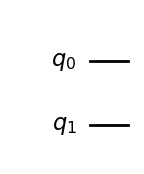

Function 2 


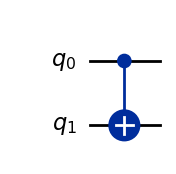

Function 3 


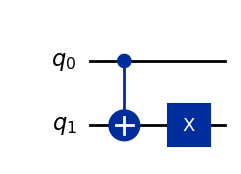

Function 4 


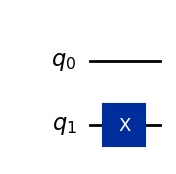

In [14]:
## This function generates a quantum circuit for one of the 4 functions from one bit to one bit
## This creates the oracle box.

def deutsch_function(case: int):

  if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

  function_circuit=QuantumCircuit(2)
  if case in [2,3]:
    function_circuit.cx(0,1)
  if case in [3,4]:
    function_circuit.x(1)
  return function_circuit

print ("Function 1 ")
display(deutsch_function(1).draw(output="mpl"))

print ("Function 2 ")
display(deutsch_function(2).draw(output="mpl"))

print ("Function 3 ")
display(deutsch_function(3).draw(output="mpl"))

print ("Function 4 ")
display(deutsch_function(4).draw(output="mpl"))


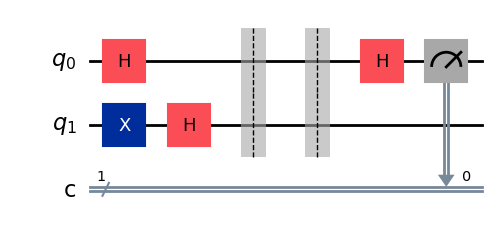

In [23]:
## Creating the real Deutsch's algorithm

def deutsch_circuit(function: QuantumCircuit):

  n = function.num_qubits - 1 #
  qc=QuantumCircuit(n+1,n)

  qc.x(n) # Select |1> state for qubit2
  qc.h(range(n + 1)) # Handermand gate for all the qubits
  qc.barrier()

  qc.compose(function, inplace=True)

  qc.barrier()
  qc.h(range(n))
  qc.measure(range(n), range(n))

  return qc

display(deutsch_circuit(deutsch_function(1)).draw(output="mpl"))


In [29]:
## Finally the Deutsch's Algorithm
## This function determined if Deutsch's function is constant or balanced.

def deutsch_algorithm(function: QuantumCircuit):
  qc = deutsch_circuit(function)

  result = AerSimulator().run(qc, shots=1, memory=True).result()
  measurements = result.get_memory()
  if measurements[0] == "0":
    return "constant"
  return "balanced"

In [38]:
f_deu=deutsch_function(1)
print ("Function 1 is")
display(deutsch_algorithm(f_deu))
print()
f_deu=deutsch_function(2)
print ("Function 2 is")
display(deutsch_algorithm(f_deu))
print()
f_deu=deutsch_function(3)
print ("Function 3 is")
display(deutsch_algorithm(f_deu))
print()
f_deu=deutsch_function(4)
print ("Function 4 is")
display(deutsch_algorithm(f_deu))

Function 1 is


'constant'


Function 2 is


'balanced'


Function 3 is


'balanced'


Function 4 is


'constant'

### Deutsch-Jozsa algorithm

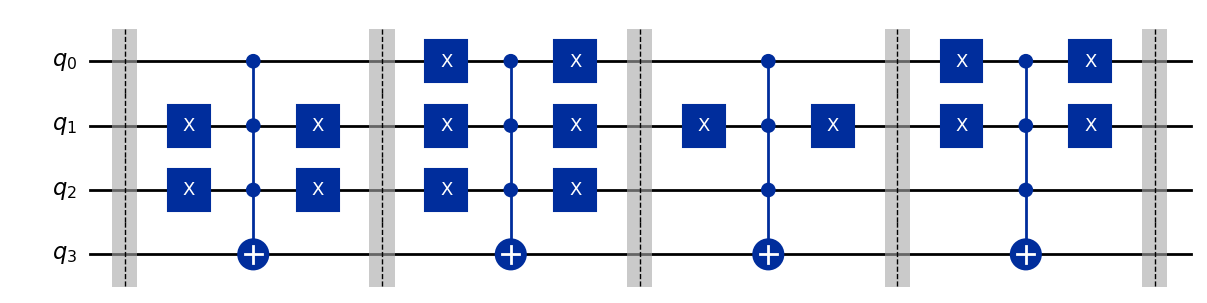

In [76]:
## Generating circuit implementing for a query gate for a random function satisfying the promise for the Deutsch-Jozsa problem.

def DJ_query(num_qubits):
  circuit=QuantumCircuit(num_qubits + 1)

## np.random.randint(0,2) genera un número aleatorio entero entre 0 (incluido) y 2 (excluido), es decir, solo puede devolver 0 o 1.
## entra en if si np.random.randint es 1 (verdadero)

  if np.random.randint(0,2):
    circuit.x(num_qubits) ## Como solo entra 50% de las veces, cambiamos el estado a |1> el 50%
  if np.random.randint(0,2):
    return circuit

  on_states = np.random.choice(range(2**num_qubits), 2**num_qubits // 2, replace=False)

  def add_cx(circuit, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                circuit.x(qubit)
        return circuit

  for state in on_states:
      circuit.barrier()  # Barriers are added to help visualize how the functions are created.
      circuit = add_cx(circuit, f"{state:0b}")
      circuit.mcx(list(range(num_qubits)), num_qubits)
      circuit = add_cx(circuit, f"{state:0b}")
  circuit.barrier()
  return circuit

display(DJ_query(3).draw(output="mpl"))



In [77]:
## Generating the DJ circuit

def DJ_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in the Deutsch-Jozsa algorithm.

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [78]:
## Run the algorithm

def dj_algorithm(function: QuantumCircuit):
    # Determine if a function is constant or balanced.

    qc = DJ_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

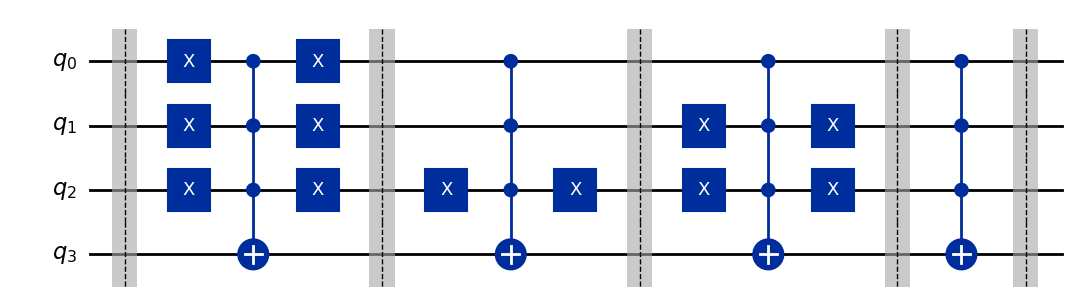

'balanced'

In [85]:
f = DJ_query(3)
display(f.draw("mpl"))
display(dj_algorithm(f))